In [1]:
#importing necessary libs
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#back prop implemented from scratch
def Back_Propagation(inp, desired_output, no_of_perceptron_in_hidden_layer, learning_rate, epoch,seed):
    
    np.random.seed(seed)
    n=no_of_perceptron_in_hidden_layer
    w1 = np.array(np.random.rand(n,2))
    w2= np.random.rand(1,n+1)[0]

    lr= learning_rate
    
    def sigmoid(x):
        try:
            return np.array([((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))) for x in x])
        except:
            return np.array((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))
        
    error_history= np.zeros(epoch)
        
    for i in range(epoch):
            for x,yd in zip(inp,desired_output):
                x= np.array([1, x])
                v1= np.dot(w1,np.reshape(x,(2,1)))
                y1 = sigmoid(v1)

                y1=np.insert(y1,0,1)
                v2= np.dot(w2,y1)
                y2= sigmoid(v2)

                e= (y2 - yd)
    
                dl2= e * (1 - y2**2)
                dw2= np.array(dl2*y1)

                dl1=np.transpose(dl2 * w2[1:])* np.transpose(sigmoid(v1)*(1-sigmoid(v1)))
                dw1= np.dot((np.reshape(dl1,(n,1))), np.reshape(x,(1,2)))
    
                w2= w2-lr*dw2
                w1= w1-lr*dw1
    
            error_history[i]=e
        
    #plt.plot([x for x in range(epoch)],error_history)
    #plt.title("Squared Error")
    #plt.ylabel("ERROR")
    #plt.xlabel("EPOCH")
    #plt.show()
    
    def predict(x):        
        res=[]
        for x1 in x:
            x=np.array([1,x1])
            y1=sigmoid(np.dot(w1,x.T))
            y1=np.insert(y1,0,1)
            y2=sigmoid(np.dot(w2,y1))
            res.append(y2)
        return res

    def accuracy(y_pred, y_test):        
        acc=[]
        for yp,yt in zip(y_pred, y_test):
            acc.append(100 - ((abs(yt-yp))*100/yt))
        return np.mean(acc)

    yp=predict(inp)  

    plt.scatter(inp,out,color='r',label='test_value')
    plt.plot(inp,yp,color='g',label='pred_value')
    plt.legend()  

    
    print("Train accuracy is",accuracy(yp,desired_output),"%")
    return w1, w2  

    
      

In [3]:
#function that prints test accuracy
def test_accuracy(x_test, y_test):

    def sigmoid(x):
        try:
            return np.array([((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))) for x in x])
        except:
            return np.array((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

    def predict(x):
        res=[]
        for x1 in x:
            x=np.array([1,x1])
            y1=sigmoid(np.dot(w1,x.T))
            y1=np.insert(y1,0,1)
            y2=sigmoid(np.dot(w2,y1))
            res.append(y2)
        return res

    def accuracy(y_pred, y_test):
        acc=[]
        for yp,yt in zip(y_pred, y_test):
            acc.append(100 - ((abs(yt-yp))*100/yt))
        return np.mean(acc)

    yp=predict(x_test)
    print("Test accuracy is",accuracy(yp,y_test),"%")

In [4]:
def train_test_split(inp,out):    
    x_test=inp[int(len(inp)*0.8):]
    y_test= out[int(len(out)*0.8):]
    return inp,out,x_test,y_test

In [5]:
print("f(x)= 1/x")
inp=np.array([x for x in range(1,101)])
out=np.array([1/x for x in inp])
x_train,y_train,x_test,y_test=train_test_split(inp,out)

f(x)= 1/x


Network with 2 perceptrons in the single hidden layer
Train accuracy is 83.98862114136473 %
Test accuracy is 70.48918379242066 %


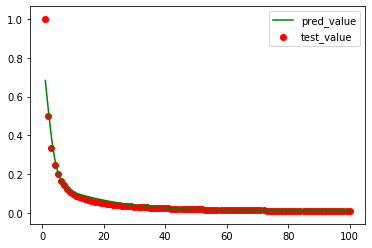

In [6]:
print("Network with 2 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,2,0.01, 1000,2)
test_accuracy(x_test, y_test)

Network with 5 perceptrons in the single hidden layer
Train accuracy is 95.00390968987162 %
Test accuracy is 95.20301387851511 %


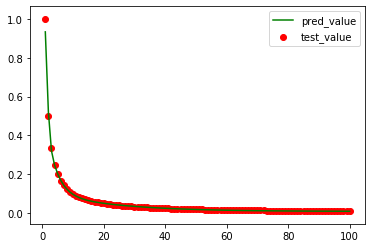

In [7]:
print("Network with 5 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,5,0.2, 1000,2)
test_accuracy(x_test, y_test)

In [8]:
print("f(x)= e^(-x)") 
inp=np.array([x*0.1 for x in range(1,101)])
out=np.array([np.exp(-x) for x in inp])
x_train,y_train,x_test,y_test=train_test_split(inp,out)

f(x)= e^(-x)


Network with 2 perceptrons in the single hidden layer
Train accuracy is 85.81431130375306 %
Test accuracy is 80.21158721215274 %


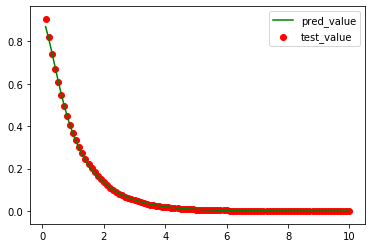

In [9]:
print("Network with 2 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,2,0.5, 3000,3)
test_accuracy(x_test, y_test)

Network with 5 perceptrons in the single hidden layer
Train accuracy is 97.66242992596986 %
Test accuracy is 98.490402744681 %


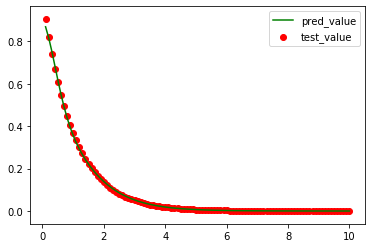

In [10]:
print("Network with 5 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,5,0.1, 1000,3)
test_accuracy(x_test, y_test)

In [11]:
print("f(x)= sin(x)")
inp=np.linspace(0.001,np.pi/2,100)
out=np.sin(inp)
x_train,y_train,x_test,y_test=train_test_split(inp,out)

f(x)= sin(x)


Network with 2 perceptrons in the single hidden layer
Train accuracy is 79.34187520541164 %
Test accuracy is 98.45581953401117 %


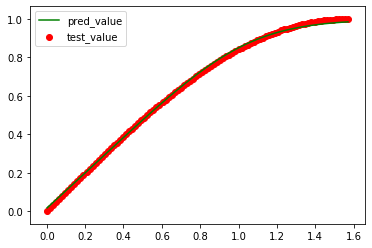

In [12]:
print("Network with 2 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,2,0.1, 1000,3)
test_accuracy(x_test, y_test)

Network with 5 perceptrons in the single hidden layer
Train accuracy is 98.70078706480213 %
Test accuracy is 99.06155959631216 %


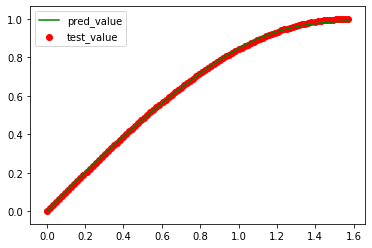

In [13]:
print("Network with 5 perceptrons in the single hidden layer")
w1,w2=Back_Propagation(x_train,y_train,5,0.1, 2000,3)
test_accuracy(x_test, y_test)